<h1 style="text-align:center">Spring 2016 Homework 6 <br> Fourier Analysis</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

This notebook will look at the Fourier Analysis of periodic functions. The exact function is compared to an N-term approximation. Then, the response to the exact and approximate inputs will be compared.

We can write any periodic function as an infinite sum of sines and cosines:

$ \quad f(t) = \sum_{n=0}^{\infty}a_n\cos(n\omega_0t) + \sum_{n=1}^{\infty}b_n\sin(n\omega_0t) $

where

$ \quad a_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\cos(n\omega_0t)dt $, 

$ \quad b_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\sin(n\omega_0t)dt $, 

and

$ \quad a_0 = \frac{\omega_0}{2\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)dt $

For more information on this process, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html). In the code below, we'll solve the required integrals numerically.

By changing the number of terms we use to approximate the original function we can approach its shape, as shown in Figure 1.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/SquareWave_Fourier_Approx.gif" alt="Fourier Analysis" width=50%/></a><br>
    <strong> Figure 1: Increasing the Number of Terms in the Approximation </strong>
</p>

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
def numerical_fourier(t, f, num_terms):
    ''' This function does the actual Numerical Fourier Expansion
     
    Arguments:
     t = time array
     y = an array representing the function to examien
     num_terms = the number of terms to use in the Fourier approx.
    
    Returns:
     approx = an array representing the Fourier approximation
    
    NOTE: numpy trapz command is trapz(y,t) (opposite order of MATLAB/Octave)
    '''

    # We'll assume the we're only requesting the solution over only one period
    # This would NOT generally be a safe assumption
    
    w0 = 2 * np.pi / t[-1]
    
    # get the a0 term
    a0 = w0 / (2.0 * np.pi) * np.trapz(f, t)  

    # fill arrays with zeros - Good practice, it speeds computation in large problems
    a = np.zeros((num_terms,))
    b = np.zeros((num_terms,))
    integral_cos = np.zeros((len(t), num_terms))
    integral_sin = np.zeros((len(t), num_terms))
    sin_term = np.zeros((num_terms, len(t)))
    cos_term = np.zeros((num_terms, len(t)))

    # cycle through the 1 to num_terms Fourier coefficients (a_n and b_n)
    for n in range(num_terms):

        # a_n calculations
        integral_cos[:,n] = f * np.cos((n + 1) * w0 * t)         # define the integral "interior"
        a[n] = w0 / np.pi * np.trapz(integral_cos[:,n], t)       # solve for a_n

        # b_n calculations
        integral_sin[:,n] = f * np.sin((n + 1) * w0 * t)         # define the integral "interior"
        b[n] = w0 / np.pi * np.trapz(integral_sin[:,n], t)       # solve for b_n

        sin_term[n,:] = np.sin((n + 1) * w0 * t)                 # calculate the nth sine term
        cos_term[n,:] = np.cos((n + 1) * w0 * t)                 # calculate the nth cosine_term


    # Generate the approximate input based on the Fourier coeff. calculated above
    approx = np.zeros_like(t) # First fill with zeros

    for ii in range(len(t)):
         approx[ii] = a0 + np.sum(a * cos_term[:, ii], 0) + np.sum(b * sin_term[:, ii], 0)
    
    return a0, a, b, approx

## Problem 3.3

In [4]:
# Form the function from the problem
time = np.linspace(0, 8, 8000)        # define the time to look at, easiest to just choose 1 period
w0 = 2.0 * np.pi/10.0                 # define the fundamental frequency (here, I know t(end)=tau)
tau_0 = 2.0 * np.pi/w0                # define fundamental period based on w0

f_bar = 0.0028                        # Amplitude of forcing function (N)

f = np.zeros_like(time)

for ii, t in enumerate(time):
    if t > 1 and t <= 2:
        f[ii] = f_bar * (t - 1)
    elif t > 2 and t <= 3:
        f[ii] = -f_bar * (t - 2) + f_bar
    elif t > 5 and t <=6:
        f[ii] = -f_bar * (t - 5)
    elif t > 6 and t <= 7:
        f[ii] = f_bar * (t - 6) - f_bar

In [5]:
# Now, let's call our numerical_fourier function
num_terms = 7
a0, a, b, prob3p3_approx = numerical_fourier(time, f, num_terms)

In [6]:
# Let's print out the a_n and b_n terms for inspection
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.0000.


The a_n terms are:

  [ 0.  0. -0.  0.  0.  0. -0.]


The b_n terms are:

  [ 0.0013 -0.     -0.0009  0.      0.0003  0.     -0.    ]


<br>
***Note***: Due to numerical precision of our numerical integration, we might have terms that are nonzero when they should be. Use your engineering knowledge/judgement to determine if this is happening.
<br>
<br>

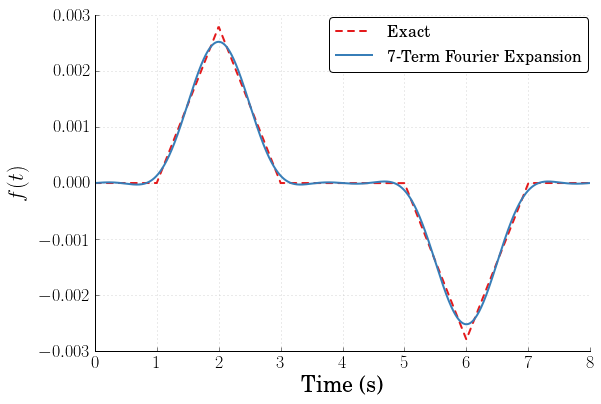

In [7]:
# Now, let's plot the comparison


# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Time (s)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$f(t)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time, f, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(time, prob3p3_approx, linewidth=2, label=f)

# plt.ylim(-1.5 ,2.5)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 3.4

In [8]:
# Form the function from the problem
time = np.linspace(0, 0.314, 3141)    # define the time to look at, easiest to just choose 1 period
w0 = 2.0 * np.pi / 0.314              # define the fundamental frequency (here, I know t(end)=tau)
tau_0 = 2.0 * np.pi / w0              # define fundamental period based on w0

y_max = 3                             # Amplitude of signal (cm)

y = np.zeros_like(time)

for ii, t in enumerate(time):
    if t > 0 and t <= tau_0 / 2:
        y[ii] = y_max / (tau_0 / 2) * t
    elif t > tau_0 / 2:
        y[ii] = y_max / (tau_0 / 2) * t - 2 * y_max

In [9]:
# Now, let's call our numerical_fourier function
num_terms = 21
a0, a, b, prob3p4_approx = numerical_fourier(time, y, num_terms)

In [10]:
# Let's print out the a_n and b_n terms for inspection
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.0010.


The a_n terms are:

  [-0.0019  0.0019 -0.0019  0.0019 -0.0019  0.0019 -0.0019  0.0019 -0.0019
  0.0019 -0.0019  0.0019 -0.0019  0.0019 -0.0019  0.0019 -0.0019  0.0019
 -0.0019  0.0019 -0.0019]


The b_n terms are:

  [ 1.9099 -0.9549  0.6366 -0.4775  0.382  -0.3183  0.2728 -0.2387  0.2122
 -0.191   0.1736 -0.1591  0.1469 -0.1364  0.1273 -0.1194  0.1123 -0.1061
  0.1005 -0.0955  0.0909]


<br>
***Note***: Due to numerical precision of our numerical integration, we might have terms that are nonzero when they should be. Use your engineering knowledge/judgement to determine if this is happening.
<br>
<br>

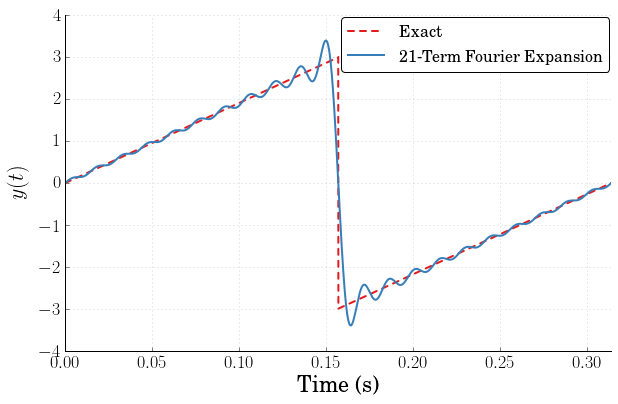

In [11]:
# Now, let's plot the comparison

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Time (s)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$y(t)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time, y, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(time, prob3p4_approx, linewidth=2, label=f)

plt.xlim(0, 0.314)
# plt.ylim(-1.5 ,2.5)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Response Comparison
Now, let's look at the response of a simple mass-spring-damper system like the one shown in Figure 1.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=35%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>


The equation of motion for the system is:

$ \quad m \ddot{x} + kx = ky $

We could also write this equation in terms of the natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

#### Control System Library
For the following simulations in this notebook, we will use the [Control Systems Library for Python](http://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python). Instructions on installation and use can be found at that link.

In [12]:
import control               # import the control system library

In [13]:
# Define the System Parameters
m = 10.0                     # kg
k = 9000                     # N/m

wn = np.sqrt(k / m)          # Natural Frequency (rad/s)

In [14]:
# Define the system to use in simulation - in transfer function form here
num = [wn**2]
den = [1, wn**2]

# Definte the transfer function
sys = control.tf(num, den)

# run the simulation - first with the exact input
[T_out, yout_exact, xout_exact] = control.forced_response(sys, time, y)

# run the simulation - now with the approximate input
[T_approx, yout_approx, xout_approx] = control.forced_response(sys, time, prob3p4_approx)

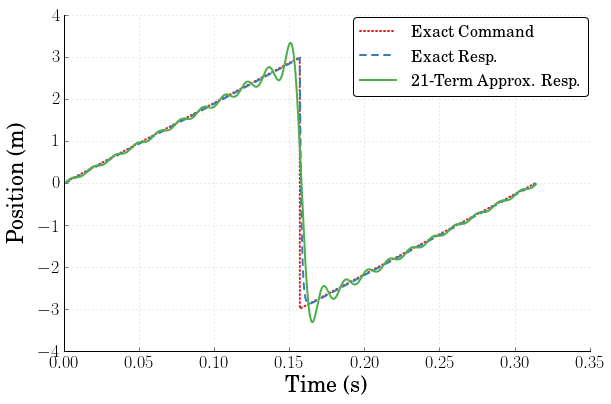

In [15]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time, y, linestyle = ':', linewidth=2, label=r'Exact Command')
plt.plot(time, yout_exact, linestyle = '--', linewidth=2, label=r'Exact Resp.')

f = str(num_terms) + '-Term Approx. Resp.'
plt.plot(time, yout_approx, linestyle = '-', linewidth=2, label=f)

# You may need to adjust these limits for best results
# plt.ylim(-2.5, 3.5)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox_Resp.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 3.8

In [16]:
# Form the function from the problem
time = np.linspace(0, 2, 2001)        # define the time to look at, easiest to just choose 1 period
w0 = 2.0 * np.pi / 2                  # define the fundamental frequency (here, I know t(end)=tau)
tau_0 = 2.0 * np.pi / w0              # define fundamental period based on w0

A = 3                                 # Amplitude of signal (cm)

y = -2 * A / tau_0 * time + A

In [17]:
# Now, let's call our numerical_fourier function
num_terms = 7
a0, a, b, prob3p8_approx = numerical_fourier(time, y, num_terms)

In [18]:
# Let's print out the a_n and b_n terms for inspection
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.0000.


The a_n terms are:

  [ 0.  0.  0.  0.  0. -0.  0.]


The b_n terms are:

  [ 1.9099  0.9549  0.6366  0.4775  0.382   0.3183  0.2728]


<br>
***Note***: Due to numerical precision of our numerical integration, we might have terms that are nonzero when they should be. Use your engineering knowledge/judgement to determine if this is happening.
<br>
<br>

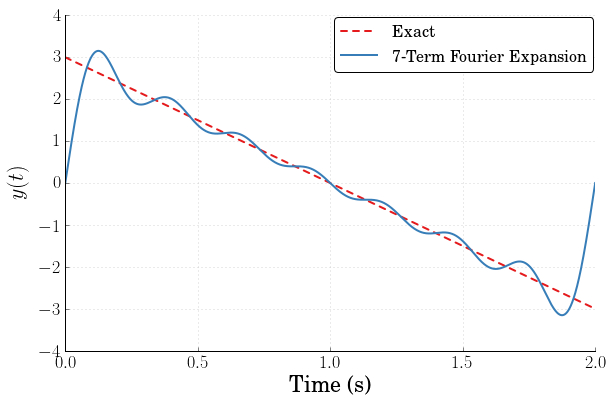

In [19]:
# Now, let's plot the comparison

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Time (s)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$y(t)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time, y, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(time, prob3p8_approx, linewidth=2, label=f)

# plt.xlim(0, 0.314)
# plt.ylim(-1.5 ,2.5)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Response Comparison
The equation of motion for the system is again:

$ \quad m \ddot{x} + kx = ky $

We could also write this equation in terms of the natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [20]:
# Define the System Parameters
m = 20.0                     # kg
k = 400                      # N/m

wn = np.sqrt(k / m)          # Natural Frequency (rad/s)

In [21]:
# Define the system to use in simulation - in transfer function form here
num = [wn**2]
den = [1, wn**2]

# Definte the transfer function
sys = control.tf(num, den)

# run the simulation - first with the exact input
[T_out, yout_exact, xout_exact] = control.forced_response(sys, time, y)

# run the simulation - now with the approximate input
[T_approx, yout_approx, xout_approx] = control.forced_response(sys, time, prob3p8_approx)

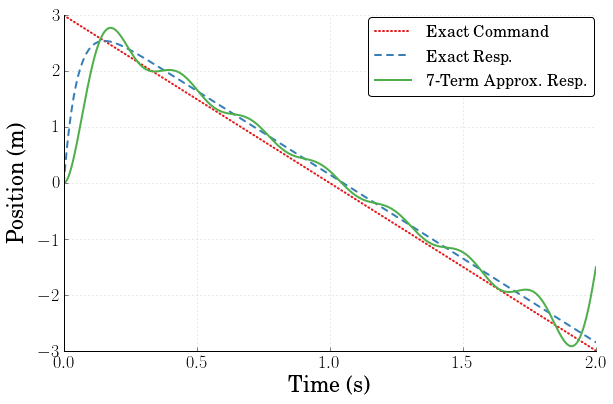

In [22]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time, y, linestyle = ':', linewidth=2, label=r'Exact Command')
plt.plot(time, yout_exact, linestyle = '--', linewidth=2, label=r'Exact Resp.')

f = str(num_terms) + '-Term Approx. Resp.'
plt.plot(time, yout_approx, linestyle = '-', linewidth=2, label=f)

# You may need to adjust these limits for best results
# plt.ylim(-2.5, 3.5)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox_Resp.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [23]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())